In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def has_high_resource(row):
    # Check if any resource requirement is above 10
    return np.any(np.array(row['job ressource requirement']) > 10)

In [3]:
def convert_to_list(row):
    if isinstance(row, list):
        return row
    # Remove brackets and split on space
    items = row.replace('[', '').replace(']', '').split(' ')
    # Remove any empty strings caused by extra spaces
    items = [item for item in items if item != '']
    # Convert strings to integers
    items = [int(item) for item in items]
    return items

In [21]:
def has_high_length(row):
    # Check if any job length is above 18
    return row['job Length'] > 18

DeepRM_2

In [54]:
df_RM2_M1 = pd.read_csv('../experiments/DeepRM_2/simu50,numex15/allocatedJobsM1.csv')
df_RM2_M2 = pd.read_csv('../experiments/DeepRM_2/simu50,numex15/allocatedJobsM2.csv')
df_RM2_M1_2 = pd.concat([df_RM2_M1, df_RM2_M2], ignore_index=True) 

df_RM2_M3 = pd.read_csv('../experiments/DeepRM_2/simu50,numex15/allocatedJobsM3.csv')

In [55]:
df_RM2_M1_2['job ressource requirement'] = df_RM2_M1_2['job ressource requirement'].apply(convert_to_list)
df_RM2_M3['job ressource requirement'] = df_RM2_M3['job ressource requirement'].apply(convert_to_list)

df_RM2_M1_2['high_resource'] = df_RM2_M1_2.apply(has_high_resource, axis=1)
df_RM2_M3['high_resource'] = df_RM2_M3.apply(has_high_resource, axis=1)

df_RM2_M1_2['high_length'] = df_RM2_M1_2.apply(has_high_length, axis=1)
df_RM2_M3['high_length'] = df_RM2_M3.apply(has_high_length, axis=1)

df_RM2_M1_2['high_length_or_resource'] = df_RM2_M1_2['high_length'] | df_RM2_M1_2['high_resource']
df_RM2_M3['high_length_or_resource'] = df_RM2_M3['high_length'] | df_RM2_M3['high_resource']

In [56]:
edge_high_length_or_resource = df_RM2_M1_2['high_length_or_resource'].sum()
cloud_high_length_or_resource = df_RM2_M3['high_length_or_resource'].sum()

print(edge_high_length_or_resource)
print(cloud_high_length_or_resource)

62
485


In [87]:
# True negatives 
TN = len(df_RM2_M1_2[(df_RM2_M1_2['high_resource'] == False) & (df_RM2_M1_2['high_length'] == False)])

# False negatives (anomalous jobs incorrectly identified as non-anomalies)
FN = len(df_RM2_M1_2[(df_RM2_M1_2['high_resource'] == True) | (df_RM2_M1_2['high_length'] == True)])

# True positives
TP = len(df_RM2_M3[(df_RM2_M3['high_resource'] == True) | (df_RM2_M3['high_length'] == True)])

# False positives (non-anomalous jobs incorrectly identified as anomalies)
FP = len(df_RM2_M3[(df_RM2_M3['high_resource'] == False) & (df_RM2_M3['high_length'] == False)])

# Metrics calculation
recall = float(TP) / (TP + FN)
precision = float(TP) / (TP + FP)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("TN:", TN, "\n"
      "FN:", FN, "\n"
      "TP:", TP, "\n"
      "FP:", FP, "\n")

print("Recall:", recall, "\n"
      "Precision:", precision, "\n"
      "F1-Score:", f1_score, "\n"
      "Accuracy:", accuracy)

TN: 57 
FN: 62 
TP: 485 
FP: 127 

Recall: 0.886654478976234 
Precision: 0.7924836601307189 
F1-Score: 0.8369283865401207 
Accuracy: 0.7414500683994528


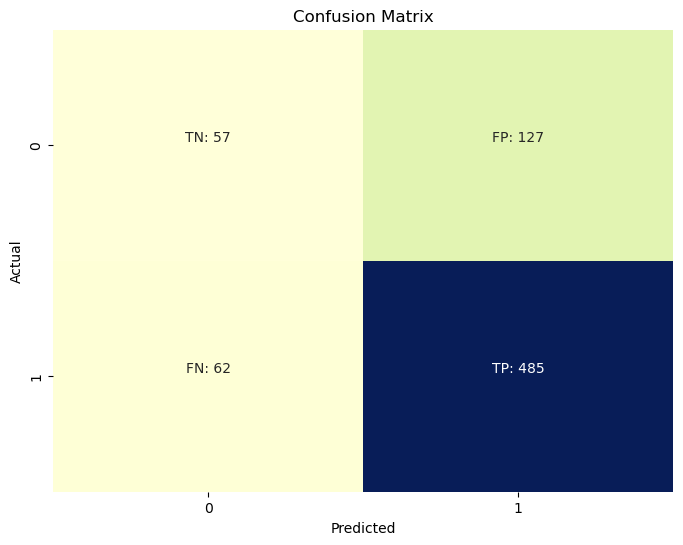

In [84]:
# Confusion matrix
confusion_df = [[TN, FP],
                [FN, TP]]

labels = [['TN: {}\n'.format(TN), 'FP: {}\n'.format(FP)], 
          ['FN: {}\n'.format(FN), 'TP: {}\n'.format(TP)]]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=labels, fmt='', cmap='YlGnBu', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

DeepRM_ECO

In [43]:
df_ECO_M1 = pd.read_csv('../experiments/DeepRM_2/simu50,numex15/allocatedJobsM1.csv')
df_ECO_M2 = pd.read_csv('../experiments/DeepRM_2/simu50,numex15/allocatedJobsM2.csv')
df_ECO_M1_2 = pd.concat([df_ECO_M1, df_ECO_M2], ignore_index=True) 

df_ECO_M3 = pd.read_csv('../experiments/DeepRM_2/simu50,numex15/allocatedJobsM3.csv')

In [44]:
df_ECO_M1_2['job ressource requirement'] = df_ECO_M1_2['job ressource requirement'].apply(convert_to_list)
df_ECO_M3['job ressource requirement'] = df_ECO_M3['job ressource requirement'].apply(convert_to_list)

df_ECO_M1_2['high_resource'] = df_ECO_M1_2.apply(has_high_resource, axis=1)
df_ECO_M3['high_resource'] = df_ECO_M3.apply(has_high_resource, axis=1)

df_ECO_M1_2['high_length'] = df_ECO_M1_2.apply(has_high_length, axis=1)
df_ECO_M3['high_length'] = df_ECO_M3.apply(has_high_length, axis=1)

df_ECO_M1_2['high_length_or_resource'] = df_ECO_M1_2['high_length'] | df_ECO_M1_2['high_resource']
df_ECO_M3['high_length_or_resource'] = df_ECO_M3['high_length'] | df_ECO_M3['high_resource']

In [45]:
edge_high_length_or_resource = df_ECO_M1_2['high_length_or_resource'].sum()
cloud_high_length_or_resource = df_ECO_M3['high_length_or_resource'].sum()

print(edge_high_length_or_resource)
print(cloud_high_length_or_resource)

62
485


In [46]:
# True negatives 
TN = len(df_ECO_M1_2[(df_ECO_M1_2['high_resource'] == False) & (df_ECO_M1_2['high_length'] == False)])

# False negatives (anomalous jobs incorrectly identified as non-anomalies)
FN = len(df_ECO_M1_2[(df_ECO_M1_2['high_resource'] == True) | (df_ECO_M1_2['high_length'] == True)])

# True positives
TP = len(df_ECO_M3[(df_ECO_M3['high_resource'] == True) | (df_ECO_M3['high_length'] == True)])

# False positives (non-anomalous jobs incorrectly identified as anomalies)
FP = len(df_ECO_M3[(df_ECO_M3['high_resource'] == False) & (df_ECO_M3['high_length'] == False)])

# Recall calculation
recall = float(TP) / (TP + FN)
recall

# Precision calculation
precision = float(TP) / (TP + FP)
precision

f1_score = 2 * (precision * recall) / (precision+recall)
f1_score

print("TN:", TN, "\n"
      "FN:", FN, "\n"
      "TP:", TP, "\n"
      "FP:", FP)
print("Precision:", precision, "\n"
      "Recall:", recall, "\n"
      "F1-Score:", f1_score)

TN: 57 
FN: 62 
TP: 485 
FP: 127
Precision: 0.7924836601307189 
Recall: 0.886654478976234 
F1-Score: 0.8369283865401207
